In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [24]:
data = pd.read_csv('bank-full.csv', sep=';')
print(data.head())
print(data.info())


   age           job  marital  education default  balance housing loan   
0   58    management  married   tertiary      no     2143     yes   no  \
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [25]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print(data.head())


   age  job  marital  education  default  balance  housing  loan  contact   
0   58    4        1          2        0     2143        1     0        2  \
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [26]:
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"تعداد نمونه‌های آموزش: {X_train.shape[0]}")
print(f"تعداد نمونه‌های تست: {X_test.shape[0]}")


تعداد نمونه‌های آموزش: 36168
تعداد نمونه‌های تست: 9043


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [28]:
import numpy as np

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)


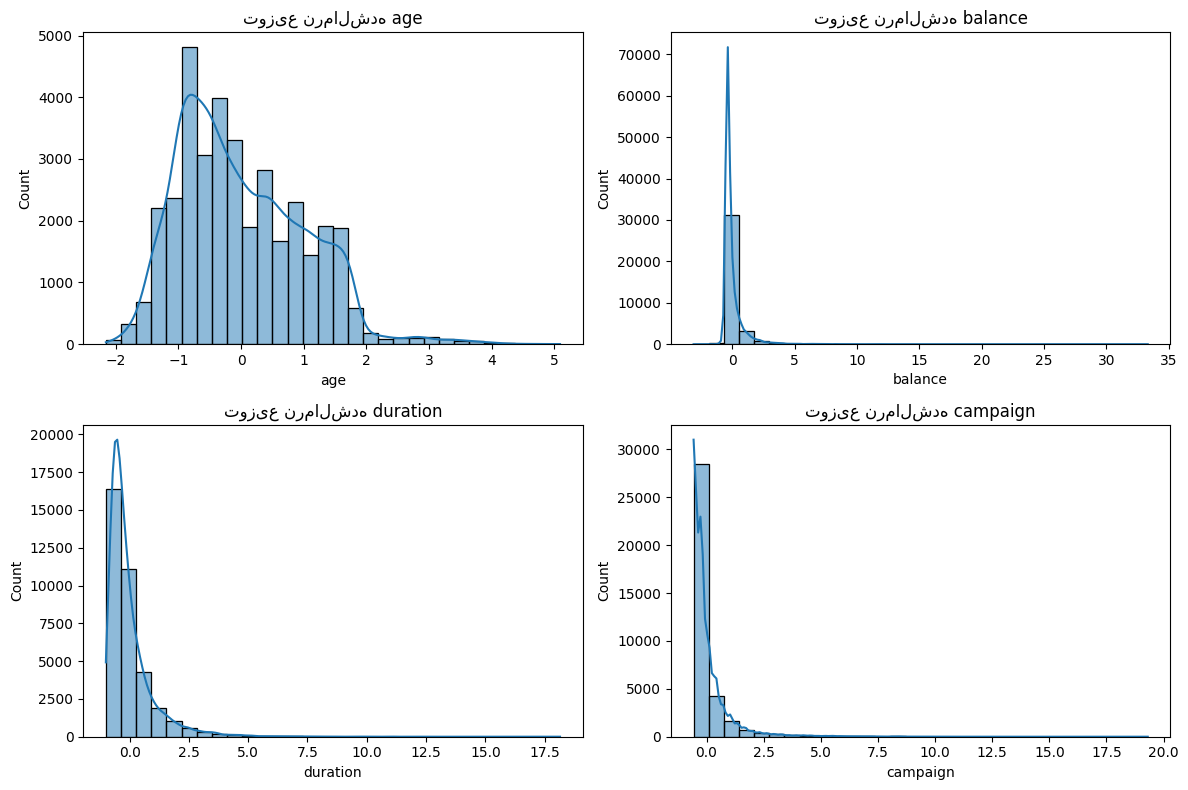

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['age', 'balance', 'duration', 'campaign']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(X_train_scaled_df[feature], kde=True, bins=30)
    plt.title(f'توزیع نرمال‌شده {feature}')
plt.tight_layout()
plt.show()


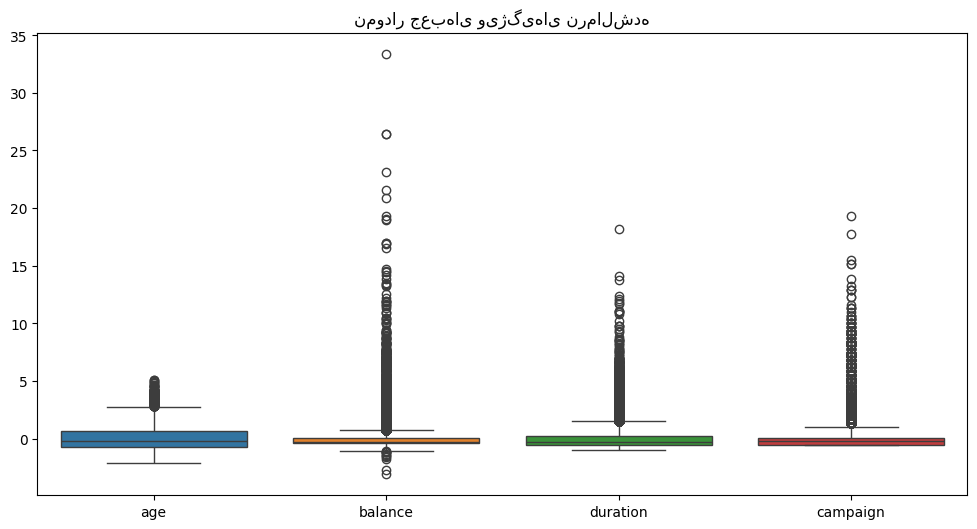

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_scaled_df[features_to_plot])
plt.title('نمودار جعبه‌ای ویژگی‌های نرمال‌شده')
plt.show()


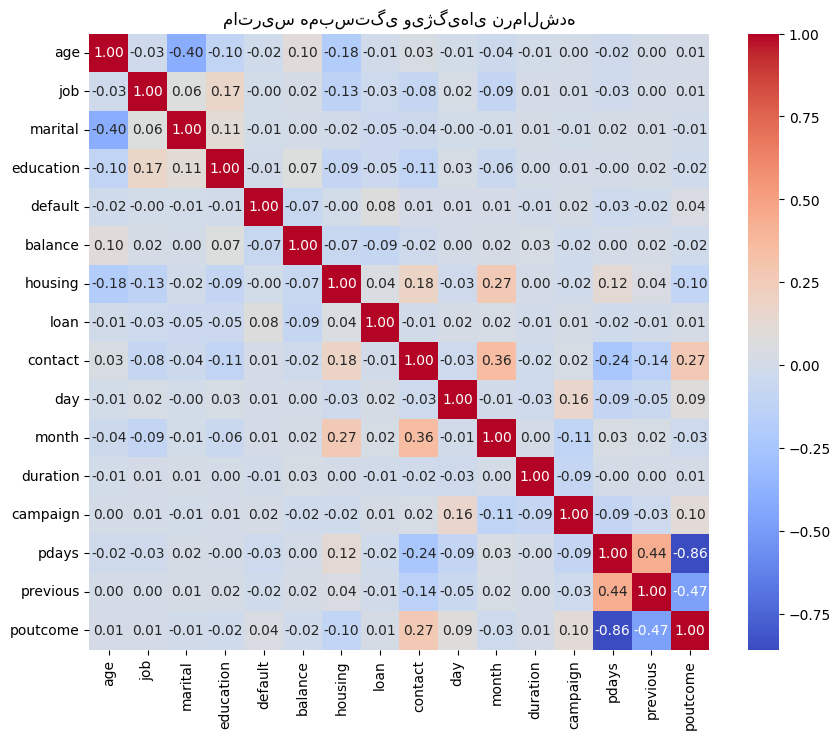

In [31]:
plt.figure(figsize=(10, 8))
corr_matrix = X_train_scaled_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('ماتریس همبستگی ویژگی‌های نرمال‌شده')
plt.show()


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [33]:
svm = SVC(kernel='rbf')

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01]
}

grid = GridSearchCV(
    svm,
    param_grid,
    refit=True,
    cv=3,
    verbose=2,
    scoring='accuracy',
    n_jobs=-1  
)


In [34]:
grid.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01]},
             scoring='accuracy', verbose=2)

In [35]:
print(f"بهترین پارامترها: {grid.best_params_}")
print(f"بهترین دقت: {grid.best_score_}")


بهترین پارامترها: {'C': 1, 'gamma': 0.1}
بهترین دقت: 0.8991926564919265


In [36]:
y_pred = grid.predict(X_test_scaled)


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل بر روی داده‌های تست: {accuracy:.4f}")

print("گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))

print("ماتریس درهم‌ریختگی:")
print(confusion_matrix(y_test, y_pred))


دقت مدل بر روی داده‌های تست: 0.8948
گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.29      0.40      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.64      0.67      9043
weighted avg       0.88      0.89      0.88      9043

ماتریس درهم‌ریختگی:
[[7772  180]
 [ 771  320]]


In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [39]:
def cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [40]:
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros(X.shape[1])
        
        for epoch in range(self.epochs):
            z = np.dot(X, self.weights)
            y_pred = sigmoid(z)
            error = y_pred - y
            gradient = np.dot(X.T, error) / y.size
            self.weights -= self.learning_rate * gradient
            
            if epoch % 100 == 0:
                loss = cross_entropy(y, y_pred)
                print(f"Epoch {epoch}, Cross-Entropy: {loss:.4f}")
    
    def predict_prob(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return sigmoid(np.dot(X, self.weights))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold


In [41]:
X_train_np = X_train_scaled
y_train_np = y_train.values

X_test_np = X_test_scaled
y_test_np = y_test.values

model = LogisticRegressionCustom(learning_rate=0.1, epochs=1000)
model.fit(X_train_np, y_train_np)


Epoch 0, Cross-Entropy: 0.6931
Epoch 100, Cross-Entropy: 0.3054
Epoch 200, Cross-Entropy: 0.2788
Epoch 300, Cross-Entropy: 0.2718
Epoch 400, Cross-Entropy: 0.2691
Epoch 500, Cross-Entropy: 0.2678
Epoch 600, Cross-Entropy: 0.2671
Epoch 700, Cross-Entropy: 0.2668
Epoch 800, Cross-Entropy: 0.2665
Epoch 900, Cross-Entropy: 0.2664


In [42]:
y_pred_custom = model.predict(X_test_np)

accuracy_custom = np.mean(y_pred_custom == y_test_np)
print(f"دقت مدل رگرسیون لجستیک سفارشی: {accuracy_custom:.4f}")

from sklearn.metrics import classification_report, confusion_matrix

print("گزارش طبقه‌بندی مدل سفارشی:")
print(classification_report(y_test_np, y_pred_custom))

print("ماتریس درهم‌ریختگی مدل سفارشی:")
print(confusion_matrix(y_test_np, y_pred_custom))


دقت مدل رگرسیون لجستیک سفارشی: 0.8876
گزارش طبقه‌بندی مدل سفارشی:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.21      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043

ماتریس درهم‌ریختگی مدل سفارشی:
[[7797  155]
 [ 861  230]]
